# Composición y reflexiones

In [ ]:
## Objetivo:


## Ejemplo

1. Importamos las librerías necesarias.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

2. Cargamos la imagen que vamos a procesar.

In [7]:
image = cv2.imread('./Resources/chrismast_dog.jpg')

print('Image type: ', type(image),
      'Image Dimensions : ', image.shape)

Image type:  <class 'numpy.ndarray'> Image Dimensions :  (481, 855, 3)


__Nota__:

Open CV lee las imágenes en color como imágenes BGR (azul, verde, rojo), no como RGB (rojo, azul, verde). Por lo tanto, los colores rojo y azul están en orden inverso y pyplot reflejan este cambio y dan como resultado una imagen de color diferente al original.

Entonces, antes de mostrar la imagen, se realiza una copia de la imagen original y se utiliza Open CV para cambiar el color de BGR a RGB.


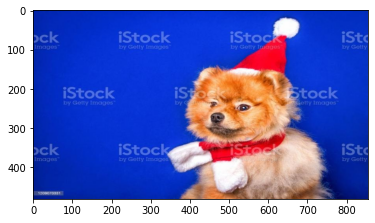

In [9]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

3. Crear un umbral de color.

__Nota__: Para crear un Umbral de color, necesitamos definir límites upper y lower para el color que necesitamos aislar y eliminar "azul".

Se utilizan los valores de umbral de color para finalmente seleccionar el área de la pantalla azul que contiene este rango de valores de color y deshacernos de él.

In [12]:
lower_blue = np.array([0, 0, 100])     ## [R value, G value, B value]
upper_blue = np.array([120, 100, 255]) 

__Nota__:
Usaremos el límite de color que se acaba de crear para crear una máscara de imagen.
Las máscaras son una forma muy común de aislar un área seleccionada de interés y hacer algo con esa área. Podemos crear una máscara sobre el área azul usando la función inRange () de Open CV.

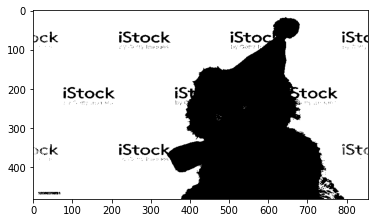

In [13]:
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

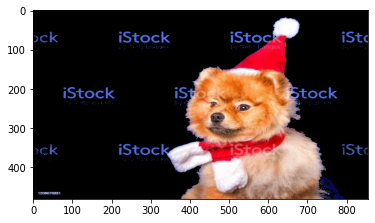

In [14]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

4. Cargamos la image de fondo.

In [20]:
background_image = cv2.imread('./Resources/konaha.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

5. Se aplica el fondo.

In [21]:
crop_background = background_image[0:720, 0:1280]

crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 720 but corresponding boolean dimension is 481

Se juntan ambas imágenes

In [22]:
final_image = crop_background + masked_image
plt.imshow(final_image)

ValueError: operands could not be broadcast together with shapes (720,1280,3) (481,855,3) 